In [2]:
import sys
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
from adjustText import adjust_text
import bean as be
import bean.model.readwrite

In [3]:
sys.path.append('../../scripts/evaluate_model_runs/')
import evaluate as ae

In [53]:
#plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [5]:
one_letter ={'VAL':'V', 'ILE':'I', 'LEU':'L', 'GLU':'E', 'GLN':'Q', \
'ASP':'D', 'ASN':'N', 'HIS':'H', 'TRP':'W', 'PHE':'F', 'TYR':'Y',    \
'ARG':'R', 'LYS':'K', 'SER':'S', 'THR':'T', 'MET':'M', 'ALA':'A',    \
'GLY':'G', 'PRO':'P', 'CYS':'C'}
aas = one_letter.values()
bdpal = sns.color_palette("bright") + sns.color_palette("deep")
aa_pal = {aa:bdpal[i] for i, aa in enumerate(aas)}
aa_to_id = {aa:i for i, aa in enumerate(aas)}
aa_to_id['nan'] = -1
aa_to_id[np.nan] = -1
aa_to_id['-']=-1
aa_numeric_pal = matplotlib.colors.ListedColormap([(1,1,1)] + [bdpal[i] for i, aa in enumerate(aas)])
aa_pal["-"] = (1,1,1)
aa_pal['*'] = 'yellow'
aa_pal['splicing'] = 'black'

In [6]:
scores_tbl = pd.read_csv("../../results/model_runs/bean_negctrl/bean_run_result.bean_count_LDLRCDS_annotated_spacer0.1_0.3/bean_element_result.MultiMixtureNormal+Acc.csv")


In [7]:
scores_tbl

,Unnamed: 0,index,edit,0,group,int_pos,pos,ref,alt,coding,...,novl,mu_scaled,mu_sd_scaled,mu_z_scaled,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj
0,0,0,11224168:T>C,0,NaN,11224168,11224168,T,C,noncoding,...,0.589122,0.592549,0.302417,1.959374,1.007450,0.581657,0.592549,0.926256,0.639725,0.243418
1,1,1,11224178:T>C,1,NaN,11224178,11224178,T,C,noncoding,...,0.710298,0.568043,0.188081,3.020201,1.009020,0.704915,0.568043,0.576063,0.986078,0.358430
2,2,2,11224175:T>C,2,NaN,11224175,11224175,T,C,noncoding,...,0.482762,-0.246710,0.346316,-0.712384,1.004579,0.482957,-0.246710,1.060710,-0.232589,0.098048
3,3,3,11224184:T>C,3,NaN,11224184,11224184,T,C,noncoding,...,0.818025,0.525688,0.103864,5.061333,1.003172,0.814633,0.525688,0.318117,1.652497,0.553066
4,4,4,11224186:A>G,4,NaN,11224186,11224186,A,G,noncoding,...,0.724964,-0.414007,0.158366,-2.614248,1.014541,0.726223,-0.414007,0.485049,-0.853537,0.381496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2177,2177,11203069:T>C,2177,NaN,11203069,11203069,T,C,noncoding,...,0.559921,0.004880,0.270018,0.018073,1.008303,0.557142,0.004880,0.827022,0.005901,0.091655
2178,2178,2178,11203079:A>G,2178,NaN,11203079,11203079,A,G,noncoding,...,0.780048,-0.053798,0.111857,-0.480952,1.007149,0.778830,-0.053798,0.342599,-0.157028,0.474873
2179,2179,2179,11203077:A>G,2179,NaN,11203077,11203077,A,G,noncoding,...,0.809682,2.020993,0.590336,3.423459,1.008165,0.805171,2.020993,1.808106,1.117740,0.561478
2180,2180,2180,11203076:A>G,2180,NaN,11203076,11203076,A,G,noncoding,...,0.149076,0.094756,0.751695,0.126056,1.007805,0.142061,0.094756,2.302323,0.041157,0.382238


In [8]:
scores_tbl_merged = ae.get_dms_df(scores_tbl, variant_table_path="../../resources/LDLR/LDLR_DMS_dbNSFP_050522.xlsx")

In [9]:
domains = pd.read_csv("../../resources/LDLR/LDLR_domains.csv", comment="#")
domains[['start', 'end']] = domains["POSITION(S)"].str.split("-", expand=True)
domains[['start', 'end']] = domains[['start', 'end']].astype(int)

In [10]:
domains.loc[len(domains.index)] = ['Domain', '1-24', 'Signal Peptide', np.nan, 1, 24]

In [11]:
domains['simple_desc'] = domains.DESCRIPTION.map(lambda s: s.replace("LDL-receptor class", "LDLR class").replace("; calcium-binding", ""))

In [12]:
scores_tbl_merged["clinvar_annot_4"] = scores_tbl_merged.clinvar_annot_2
scores_tbl_merged.loc[scores_tbl_merged.clinvar_clnsig == "Conflicting_interpretations_of_pathogenicity", "clinvar_annot_4"] = "Conflicting"
scores_tbl_merged.loc[scores_tbl_merged.clinvar_clnsig == "Uncertain_significance", "clinvar_annot_4"] = "VUS"
scores_tbl_merged.loc[scores_tbl_merged.clinvar_annot_4.isnull(), "clinvar_annot_4"] = ""

In [13]:
scores_tbl_merged.loc[scores_tbl_merged.coding == "coding", "ref_aa"] = scores_tbl_merged.loc[scores_tbl_merged.coding == "coding", "ref"]
scores_tbl_merged.loc[scores_tbl_merged.coding == "coding", "domain"] = "N/A"
scores_tbl_merged.loc[scores_tbl_merged.coding == "coding", "domain"] = scores_tbl_merged.loc[scores_tbl_merged.coding == "coding", "pos"].map(lambda s: int(s.split("A")[-1])).map(lambda i: domains.loc[(domains.start <= i) & (domains.end >= i), 'simple_desc'].iloc[0] if any((domains.start <= i) & (domains.end >= i)) else "N/A")

In [14]:
col_map = {"target_group_Normal":"target_group", "target_variant_Normal":"target_variant", "edit_rate_mean_Normal":"edit_rate_mean", "edit_rate_std_Normal":"edit_rate_std", "ref_MultiMixtureNormal":"ref", "alt_MultiMixtureNormal":"alt",}
scores_tbl = scores_tbl.rename(columns=col_map)

In [15]:
pal = sns.color_palette()
pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [16]:
domain_pal_simple = {"LDLR class A":pal[-1], "LDLR class B":pal[3], "EGF-like":pal[-2], "":pal[-3], "Signal Peptide":pal[2]}

In [17]:
group_pal = {"missense":pal[-2], "syn":pal[0], "splicing": pal[3],"missense (ClinVar P/LP)":pal[1] ,"negctrl" : pal[-3]}

WARNING @ Thu, 24 Aug 2023 18:47:29:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 24 Aug 2023 18:47:29:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 24 Aug 2023 18:47:29:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 24 Aug 2023 18:47:29:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 24 Aug 2023 18:47:29:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Libera

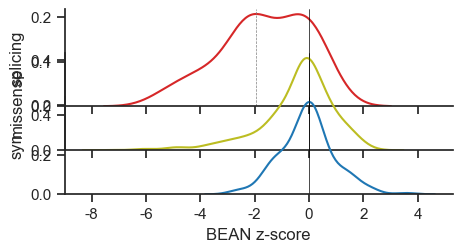

In [57]:
plt.style.use('jr')
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
fig, ax = plt.subplots(3, 1, figsize=(5,4), sharex=True)

for i, g in enumerate(['splicing', 'missense', 'syn']):
    sns.kdeplot(scores_tbl.loc[scores_tbl.group == g], x = "mu_z_adj", hue='group', palette=group_pal, ax = ax[i])
    ax[i].axvline(0, c = 'black', linewidth=0.5)
    if i == 0:
        ax[i].axvline(-1.96, c = 'grey', linewidth=0.5, linestyle='--', label = "z=-1.96")
    ax[i].get_legend().remove()
    ax[i].set_ylabel(g)
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].set_box_aspect(0.25)
fig.subplots_adjust(hspace=-0.8)
ax[-1].set_xlabel("BEAN z-score")
fig.savefig("control_distributions_v4.pdf")

In [19]:
scores_tbl_merged['group+ref'] = scores_tbl_merged['group']
scores_tbl_merged.loc[scores_tbl_merged['group+ref'] == 'missense', 'group+ref'] = scores_tbl_merged.loc[scores_tbl_merged['group+ref'] == 'missense', 'ref_aa']

In [20]:
scores_tbl_merged['domain_family'] = scores_tbl_merged['domain']
scores_tbl_merged.loc[scores_tbl_merged.domain_family.map(lambda s: ("LDLR class" in s or "EGF" in s) if type(s) is str else False), "domain_family"] = scores_tbl_merged.loc[scores_tbl_merged.domain_family.map(lambda s: ("LDLR class" in s or "EGF" in s) if type(s) is str else False),"domain_family"].map(lambda s: s.rsplit(" ", 1)[0] if type(s) is str else "")

In [21]:
scores_tbl_merged['domain_family_simple'] = scores_tbl_merged.domain_family.map(lambda s: s.replace("LDL-receptor", "LDLR") if s in ["LDLR class A", "LDLR class B", "EGF-like", "Signal Peptide"] else "")

In [22]:
cbpal = sns.color_palette("colorblind")

In [23]:
plt.style.use('default')

In [24]:
pal = sns.color_palette()

In [25]:
plot_tbl = scores_tbl_merged.loc[(~scores_tbl_merged.clinvar_annot_4.isnull()) & (scores_tbl_merged.group.isin(["splicing", "missense"]))].copy()

In [26]:
scores_tbl_merged['aastr'] = scores_tbl_merged.apply(lambda df: f"{df.ref}{df.pos.split('A')[-1]}{df.alt}", axis=1)

In [27]:
scores_tbl_merged.loc[(scores_tbl_merged.coding == "coding") & (scores_tbl_merged.clinvar_annot_2.isnull())].sort_values("mu_z_adj").iloc[:25,:]

,Unnamed: 0,index,edit,0,group,int_pos,pos,ref,alt,coding,...,phylo100,clinvar_annot_3,clinvar_annot_2,clinvar_annot_4,ref_aa,domain,group+ref,domain_family,domain_family_simple,aastr
823,823,823,A1:M>T,823,missense,-1,A1,M,T,coding,...,1.766,NaN,NaN,Conflicting,M,Signal Peptide,M,Signal Peptide,Signal Peptide,M1T
1239,1239,1239,A222:C>R,1239,missense,-1,A222,C,R,coding,...,7.924,NaN,NaN,Conflicting,C,LDLR class A 5,C,LDLR class A,LDLR class A,C222R
1703,1703,1703,A364:C>R,1703,missense,-1,A364,C,R,coding,...,7.835,NaN,NaN,Conflicting,C,EGF-like 2,C,EGF-like,EGF-like,C364R
841,841,841,A16:L>P,841,missense,-1,A16,L,P,coding,...,3.104,NaN,NaN,Conflicting,L,Signal Peptide,L,Signal Peptide,Signal Peptide,L16P
492,492,492,A711:C>R,492,missense,-1,A711,C,R,coding,...,7.877,NaN,NaN,,C,EGF-like 3,C,EGF-like,EGF-like,C711R
1532,1532,1532,A289:C>R,1532,missense,-1,A289,C,R,coding,...,7.915,NaN,NaN,Conflicting,C,LDLR class A 7,C,LDLR class A,LDLR class A,C289R
838,838,838,A14:L>S,838,missense,-1,A14,L,S,coding,...,1.771,NaN,NaN,,L,Signal Peptide,L,Signal Peptide,Signal Peptide,L14S
1617,1617,1617,A325:C>R,1617,missense,-1,A325,C,R,coding,...,7.764,NaN,NaN,,C,EGF-like 1,C,EGF-like,EGF-like,C325R
146,146,146,A531:M>T,146,missense,-1,A531,M,T,coding,...,7.917,NaN,NaN,,M,LDLR class B 4,M,LDLR class B,LDLR class B,M531T
1163,1163,1163,A153:F>P,1163,missense,-1,A153,F,P,coding,...,NaN,NaN,NaN,,F,LDLR class A 4,F,LDLR class A,LDLR class A,F153P


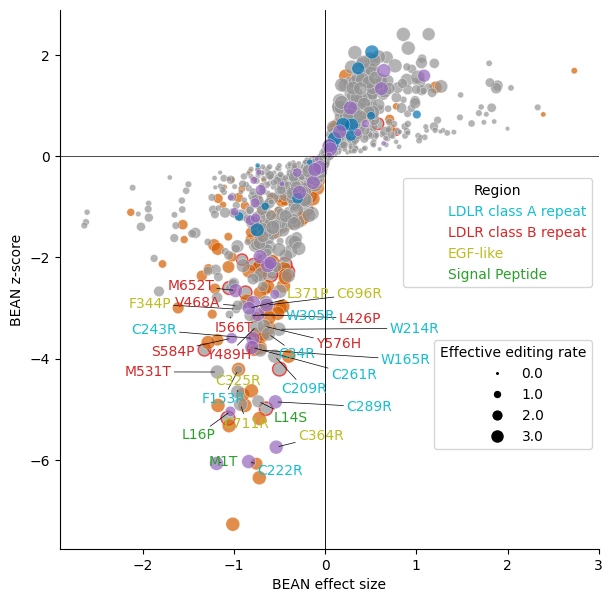

In [28]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
plot_tbl = scores_tbl_merged.loc[(scores_tbl_merged.group.isin(["splicing", "missense"]))].copy()
missense_tbl = scores_tbl_merged.loc[(scores_tbl_merged.group.isin(["missense"]))].copy()
hue_order = ["Pathogenic/Likely_Pathogenic", "", "Benign/Likely_Benign", "Conflicting", "VUS", ]

splice_tbl = scores_tbl_merged.loc[(scores_tbl_merged.group.isin(["splicing"]))].copy()

sns.scatterplot(splice_tbl, x = 'mu_adj', y= 'mu_z_adj', 
                hue = "clinvar_annot_4",  alpha = 0.7, palette = {"Pathogenic/Likely_Pathogenic":cbpal[3],"Benign/Likely_Benign":cbpal[0], "Conflicting":pal[4], "VUS":pal[4],"":cbpal[-3]}, hue_order = hue_order, 
               size='effective_edit_rate', sizes=(10,100), size_norm=(0,3), edgecolor="red", linewidth=1, ax=ax
           )

missense_tbl=missense_tbl.sort_values('clinvar_annot_4', key=np.vectorize(hue_order.index))
sns.scatterplot(missense_tbl, x = 'mu_adj', y= 'mu_z_adj', 
                hue = "clinvar_annot_4",  alpha = 0.7, palette = {"Pathogenic/Likely_Pathogenic":cbpal[3],"Benign/Likely_Benign":cbpal[0], "Conflicting":pal[4], "VUS":pal[4],"":cbpal[-3]}, hue_order = hue_order, 
               size='effective_edit_rate', sizes=(10,100), size_norm=(0,3),ax=ax
           )



ax.set_xlabel("BEAN effect size")
ax.set_ylabel("BEAN z-score")
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect(1/ax.get_data_ratio(), 'box')
ax.get_legend().remove()
ax.spines[['right', 'top']].set_visible(False)

## legends

# Region
region_handles = [
    Line2D([], [], color="None", markerfacecolor=pal[-1], marker='o', markersize=0, markeredgecolor="white"),
    Line2D([], [], color="None", markerfacecolor=pal[3], marker='o', markersize=0, markeredgecolor="white"),
    Line2D([], [], color="None", markerfacecolor=pal[-2], marker='o', markersize=0, markeredgecolor="white"),
    Line2D([], [], color="None", markerfacecolor=pal[2], marker='o', markersize=0, markeredgecolor="white"),
]
legend = ax.legend(handles=region_handles, labels=["LDLR class A repeat", "LDLR class B repeat", "EGF-like", "Signal Peptide"], labelcolor = "markerfacecolor", bbox_to_anchor=(1, 0.7), loc="upper right", title="Region",)

# ClinVar
# clin_handles = [
#     Line2D([], [], color="None", markerfacecolor=cbpal[3], marker='o', markersize=10, markeredgecolor="white"),
#     Line2D([], [], color="None", markerfacecolor=cbpal[0], marker='o', markersize=10, markeredgecolor="white"),
#     Line2D([], [], color="None", markerfacecolor=pal[4], marker='o', markersize=10, markeredgecolor="white"),
#     Line2D([], [], color="None", markerfacecolor=cbpal[-3], marker='o', markersize=10, markeredgecolor="white"),
# ]
# legend2 = ax.legend(handles=clin_handles, labels=["Pathogenic/Likely Pathogenic", "Benign/Likely Benign", "Conflicting/VUS", "No annotation"], bbox_to_anchor=(1, 0.95), loc="upper right", title="ClinVar annotation",)

# Editing rate
edit_handles = [
    (Line2D([], [], color="None", marker="o", markersize=s, markerfacecolor="black", markeredgecolor="white"),
    ) for s in np.sqrt(np.linspace(10,100,4)) # s = markersize**2, see https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
]
legend3 = ax.legend(handles=edit_handles, labels=np.linspace(0,3,4).tolist(), bbox_to_anchor=(1, 0.4), loc="upper right", title="Effective editing rate", handler_map={tuple: HandlerTuple(ndivide=None, pad=5)}, scatterpoints = 5, )

plt.gca().add_artist(legend)
#plt.gca().add_artist(legend2)

## texts
texts = [ax.text(df['mu_adj'], df['mu_z_adj'],df.aastr, color = domain_pal_simple[df["domain_family_simple"]], size=10) for i, df in scores_tbl_merged.loc[(scores_tbl_merged.coding == "coding") & (scores_tbl_merged.clinvar_annot_2.isnull())].sort_values("mu_z_adj").iloc[:25,:].iterrows()]
pdf = scores_tbl_merged.loc[scores_tbl_merged.aastr.isin(["M652T", "C696R", "L731P"]),:]
texts.extend([ax.text(df['mu_adj'], df['mu_z_adj'],df.aastr, color = domain_pal_simple[df["domain_family_simple"]], size=10) for i, df in pdf.iterrows()])
ax.axvline(0, color='black', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.set_aspect(1/ax.get_data_ratio(), 'box')

#fig.legend(bbox_to_anchor=(1, 0.5), loc='center left', title='edit rate')
ax.spines[['right', 'top']].set_visible(False)
adjust_text(texts, plot_tbl.mu_adj, plot_tbl.mu_z_adj, arrowprops=dict(arrowstyle='-', color='black', linewidth=0.5), ax = ax, force_text=(0.5, 0.5), force_static=(0.3, 0.3), min_arrow_len=0)#force_objects=(5, 5))

fig.savefig("variant_scores_zscore_v4.pdf", bbox_inches='tight')

In [29]:
scores_tbl_merged

,Unnamed: 0,index,edit,0,group,int_pos,pos,ref,alt,coding,...,phylo100,clinvar_annot_3,clinvar_annot_2,clinvar_annot_4,ref_aa,domain,group+ref,domain_family,domain_family_simple,aastr
0,0,0,11224168:T>C,0,NaN,11224168,11224168,T,C,noncoding,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,T11224168C
1,1,1,11224178:T>C,1,NaN,11224178,11224178,T,C,noncoding,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,T11224178C
2,2,2,11224175:T>C,2,NaN,11224175,11224175,T,C,noncoding,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,T11224175C
3,3,3,11224184:T>C,3,NaN,11224184,11224184,T,C,noncoding,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,T11224184C
4,4,4,11224186:A>G,4,NaN,11224186,11224186,A,G,noncoding,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,A11224186G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2177,2177,11203069:T>C,2177,NaN,11203069,11203069,T,C,noncoding,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,T11203069C
2178,2178,2178,11203079:A>G,2178,NaN,11203079,11203079,A,G,noncoding,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,A11203079G
2179,2179,2179,11203077:A>G,2179,NaN,11203077,11203077,A,G,noncoding,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,A11203077G
2180,2180,2180,11203076:A>G,2180,NaN,11203076,11203076,A,G,noncoding,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,A11203076G


In [58]:
scores_tbl_merged.loc[(scores_tbl_merged.mu_z_adj < -1.96), "clinvar_annot_4"].value_counts()

Unannotated                     67
Pathogenic/Likely_Pathogenic    47
Conflicting                     12
VUS                              5
Name: clinvar_annot_4, dtype: int64

In [41]:
pdf = scores_tbl_merged
ca_pal = {"Pathogenic/Likely_Pathogenic":cbpal[3],"Benign/Likely_Benign":cbpal[0], "Conflicting":pal[4], "VUS":pal[4],"Unannotated":cbpal[-3]}
pdf['ca'] = pd.Categorical(pdf['clinvar_annot_4'], ["Pathogenic/Likely_Pathogenic", "Conflicting", "VUS", "Unannotated", "Benign/Likely_Benign"])
pdf = pdf.sort_values('ca')

WARNING @ Thu, 24 Aug 2023 18:47:23:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 24 Aug 2023 18:47:23:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 24 Aug 2023 18:47:23:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 24 Aug 2023 18:47:23:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 24 Aug 2023 18:47:23:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Libera

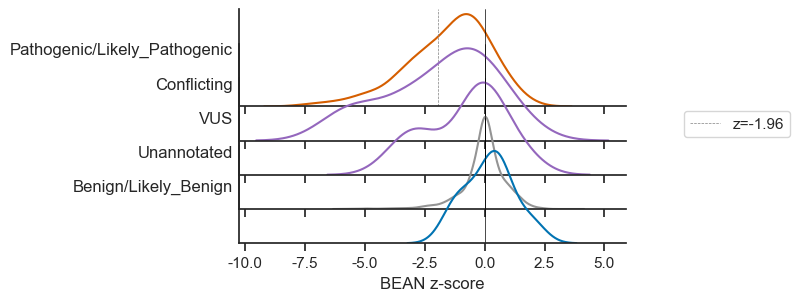

In [56]:
plt.style.use('jr')
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
fig, ax = plt.subplots(5, 1, figsize=(5,4), sharex=True)

for i, g in enumerate(pdf.clinvar_annot_4.unique()):
    sns.kdeplot(pdf.loc[pdf.clinvar_annot_4 == g], x = "mu_z_adj", hue='clinvar_annot_4', palette=ca_pal, ax = ax[i])
    ax[i].axvline(0, c = 'black', linewidth=0.5)
    if i == 0:
        ax[i].axvline(-1.96, c = 'grey', linewidth=0.5, linestyle='--', label = "z=-1.96")
    ax[i].get_legend().remove()
    ax[i].set_ylabel(g)
    ax[i].set_ylabel(g, rotation=0, ha="right", )
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].set_box_aspect(0.25)
fig.legend(bbox_to_anchor=(1, 0.5), loc="center left")

ax[-1].set_xlabel("BEAN z-score")
plt.setp(ax, yticks=[])
fig.subplots_adjust(hspace=-0.8)
ax[-1].set_xlabel("BEAN z-score")
fig.savefig("clinvar_distributions_v4.pdf")

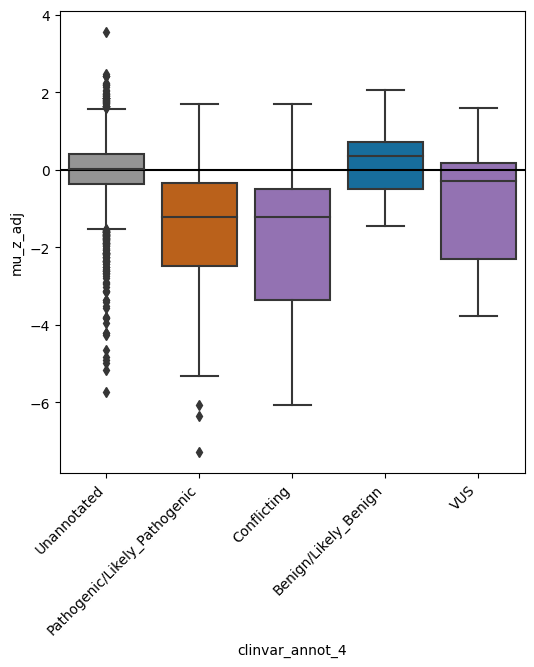

In [40]:
fig, ax = plt.subplots(figsize=(6,6))
scores_tbl_merged.loc[scores_tbl_merged.clinvar_annot_4=="", 'clinvar_annot_4'] = "Unannotated"
sns.boxplot(scores_tbl_merged, x = "clinvar_annot_4", y = "mu_z_adj", ax = ax, palette=)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")
ax.axhline(0, color='black')